
🔍 Missing Values Before Imputation:
show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

 Number of Outliers in 'duration_minutes': 247


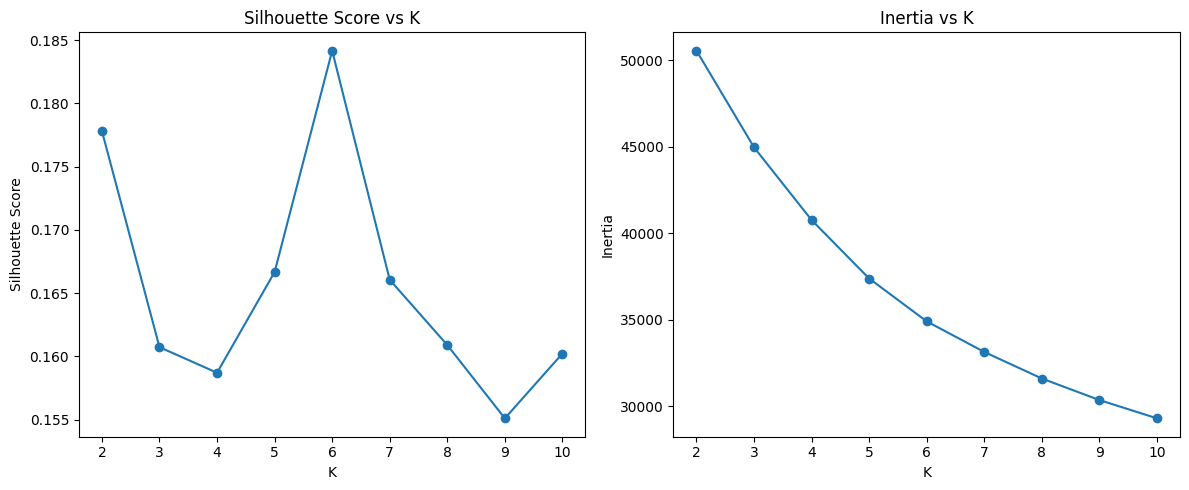


 Best K: 6 with Silhouette Score: 0.184
DBSCAN Silhouette Score: 0.092
Agglomerative Clustering Silhouette Score: 0.166


In [7]:



import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("/content/Netflix_movies_and_tv_shows_clustering.csv")


print("\n🔍 Missing Values Before Imputation:")
print(df.isnull().sum())


df['duration_minutes'] = df['duration'].apply(
    lambda x: int(x.split()[0]) * 60 if 'Season' in str(x) else int(x.split()[0]) if pd.notnull(x) else np.nan
)


df.drop(columns=['show_id', 'title', 'director', 'cast', 'description'], inplace=True)


imputer = SimpleImputer(strategy='most_frequent')
df[['country', 'rating', 'date_added']] = imputer.fit_transform(df[['country', 'rating', 'date_added']])


Q1 = df['duration_minutes'].quantile(0.25)
Q3 = df['duration_minutes'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['duration_minutes'] < lower_bound) | (df['duration_minutes'] > upper_bound)]

print(f"\n Number of Outliers in 'duration_minutes': {len(outliers)}")


df = df[(df['duration_minutes'] >= lower_bound) & (df['duration_minutes'] <= upper_bound)]


le_dict = {}
for col in ['type', 'country', 'rating', 'listed_in']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le


df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df.drop(columns=['duration', 'date_added'], inplace=True)


X = df.copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


sil_scores = []
inertias = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    inertias.append(kmeans.inertia_)


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, sil_scores, marker='o')
plt.title("Silhouette Score vs K")
plt.xlabel("K")
plt.ylabel("Silhouette Score")

plt.subplot(1, 2, 2)
plt.plot(k_range, inertias, marker='o')
plt.title("Inertia vs K")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.tight_layout()
plt.show()


best_k = k_range[sil_scores.index(max(sil_scores))]
print(f"\n Best K: {best_k} with Silhouette Score: {max(sil_scores):.3f}")

kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
dbscan_score = silhouette_score(X_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
print(f"DBSCAN Silhouette Score: {dbscan_score:.3f}")


agg = AgglomerativeClustering(n_clusters=best_k)
agg_labels = agg.fit_predict(X_scaled)
agg_score = silhouette_score(X_scaled, agg_labels)
print(f"Agglomerative Clustering Silhouette Score: {agg_score:.3f}")



🔍 Missing Values Before Imputation:
show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

 Number of Outliers in 'duration_minutes': 247


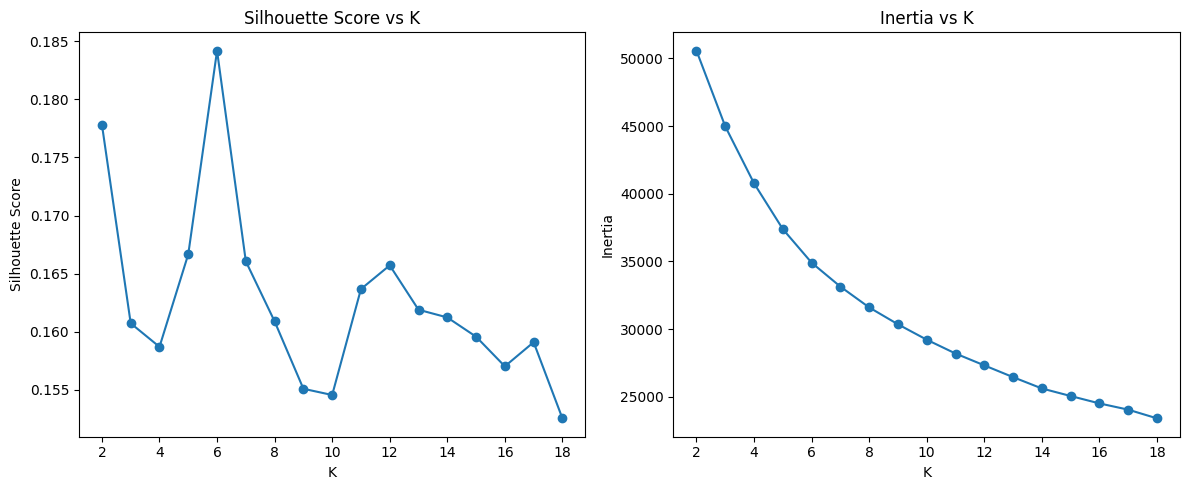


 Best K: 6 with Silhouette Score: 0.184
DBSCAN Silhouette Score: 0.092
Agglomerative Clustering Silhouette Score: 0.166


In [12]:



import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("/content/Netflix_movies_and_tv_shows_clustering.csv")


print("\n🔍 Missing Values Before Imputation:")
print(df.isnull().sum())


df['duration_minutes'] = df['duration'].apply(
    lambda x: int(x.split()[0]) * 60 if 'Season' in str(x) else int(x.split()[0]) if pd.notnull(x) else np.nan
)


df.drop(columns=['show_id', 'title', 'director', 'cast', 'description'], inplace=True)


imputer = SimpleImputer(strategy='most_frequent')
df[['country', 'rating', 'date_added']] = imputer.fit_transform(df[['country', 'rating', 'date_added']])


Q1 = df['duration_minutes'].quantile(0.25)
Q3 = df['duration_minutes'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['duration_minutes'] < lower_bound) | (df['duration_minutes'] > upper_bound)]

print(f"\n Number of Outliers in 'duration_minutes': {len(outliers)}")


df = df[(df['duration_minutes'] >= lower_bound) & (df['duration_minutes'] <= upper_bound)]


le_dict = {}
for col in ['type', 'country', 'rating', 'listed_in']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le


df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df.drop(columns=['duration', 'date_added'], inplace=True)


X = df.copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


sil_scores = []
inertias = []
k_range = range(2, 19)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    kmeans.fit(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    inertias.append(kmeans.inertia_)


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, sil_scores, marker='o')
plt.title("Silhouette Score vs K")
plt.xlabel("K")
plt.ylabel("Silhouette Score")

plt.subplot(1, 2, 2)
plt.plot(k_range, inertias, marker='o')
plt.title("Inertia vs K")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.tight_layout()
plt.show()


best_k = k_range[sil_scores.index(max(sil_scores))]
print(f"\n Best K: {best_k} with Silhouette Score: {max(sil_scores):.3f}")

kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=20)
kmeans_labels = kmeans.fit_predict(X_scaled)

dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
dbscan_score = silhouette_score(X_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
print(f"DBSCAN Silhouette Score: {dbscan_score:.3f}")


agg = AgglomerativeClustering(n_clusters=best_k)
agg_labels = agg.fit_predict(X_scaled)
agg_score = silhouette_score(X_scaled, agg_labels)
print(f"Agglomerative Clustering Silhouette Score: {agg_score:.3f}")


In [ ]:
|